In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('Social_Network_Ads.csv')
print(df)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026C07333EC8>,
      dtype=object)

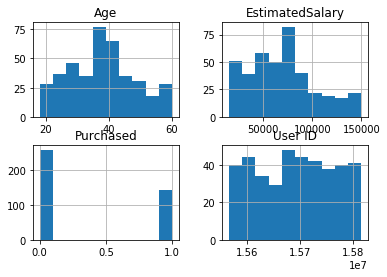

In [2]:
df.hist()

In [3]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [84]:
X = df.iloc[:, [2, 3]]
y = df.iloc[:, 4]

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3,shuffle=True, random_state=5)

In [86]:
X_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)).values
X_test=(X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test)).values

In [87]:
from sklearn.ensemble import BaggingClassifier

In [88]:
from sklearn.neighbors import KNeighborsClassifier

m = KNeighborsClassifier(n_neighbors=3)

In [89]:
bag = BaggingClassifier(
    max_samples=.4)

In [90]:
bag.fit(X_train, y_train)

BaggingClassifier(max_samples=0.4)

In [91]:
bag.score(X_test, y_test)

0.875

In [92]:
bag.score(X_train, y_train)

0.9571428571428572

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
m = RandomForestClassifier(n_estimators=20)

In [95]:
m.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [96]:
m.score(X_test, y_test)

0.8833333333333333

In [97]:
m.score(X_train, y_train)

0.9928571428571429

In [98]:
from sklearn.ensemble import AdaBoostClassifier

In [99]:
n = AdaBoostClassifier(base_estimator=None, n_estimators=200)

In [100]:
n.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=200)

In [101]:
n.score(X_test, y_test)

0.8583333333333333

In [102]:
n.score(X_train, y_train)

0.9607142857142857

In [103]:
from sklearn.ensemble import VotingClassifier

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

In [105]:
mm = VotingClassifier(
    estimators=[('lr', LogisticRegression()),
                ('rf', RandomForestClassifier()),
                ('dtc', DecisionTreeClassifier()),                
                ('svm', svm.SVC(kernel='linear')),
                ('gnb', GaussianNB())], 
    voting='hard')

In [106]:
mm.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('dtc', DecisionTreeClassifier()),
                             ('svm', SVC(kernel='linear')),
                             ('gnb', GaussianNB())])

In [107]:
mm.score(X_test, y_test)

0.8833333333333333

In [108]:
mm.score(X_train, y_train)

0.9142857142857143

In [109]:
yhat = mm.predict(X_test)
yhat

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

In [110]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,yhat))

0.8833333333333333


In [111]:
from sklearn.metrics import classification_report
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        77
           1       0.87      0.79      0.83        43

    accuracy                           0.88       120
   macro avg       0.88      0.86      0.87       120
weighted avg       0.88      0.88      0.88       120



[[72  5]
 [ 9 34]]


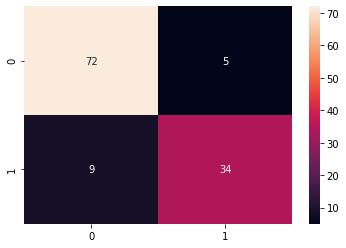

In [112]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,yhat))
sns.heatmap(confusion_matrix(y_test,yhat),annot=True)

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [114]:
from sklearn.tree import DecisionTreeClassifier

In [115]:
from sklearn.tree import DecisionTreeRegressor

In [116]:
dt_model = DecisionTreeClassifier(random_state=10)

In [117]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [118]:
dt_model.score(X_train, y_train)

0.9964285714285714

In [119]:
dt_model.score(X_test, y_test)

0.825

In [120]:
dt_model.predict(X_test)

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [121]:
dt_model.predict_proba(X_test)

array([[1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.5, 0.5],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. ,

In [122]:
y_pred = dt_model.predict_proba(X_test)[:,1]

In [123]:
y_new = []
for i in range(len(y_pred)):
    if y_pred[i]<=0.7:
        y_new.append(0)
    else:
        y_new.append(1)

In [124]:
from sklearn.metrics import accuracy_score

In [125]:
accuracy_score(y_test, y_new)

0.825

In [126]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,10):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(X_train, y_train)
    train_accuracy.append(dt_model.score(X_train, y_train))
    validation_accuracy.append(dt_model.score(X_test, y_test))

In [127]:
frame = pd.DataFrame({'max_depth':range(1,10), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.842857,0.833333
1,2,0.935714,0.858333
2,3,0.939286,0.841667
3,4,0.953571,0.850000
4,5,0.964286,0.850000


In [128]:
dt_model = DecisionTreeClassifier(max_depth=8, max_leaf_nodes=25, random_state=10)

In [129]:
dt_model.fit(X_train, y_train)
dt_model.score(X_train, y_train)


0.9785714285714285

In [130]:
dt_model.score(X_test, y_test)


0.8333333333333334

In [131]:
from sklearn import tree

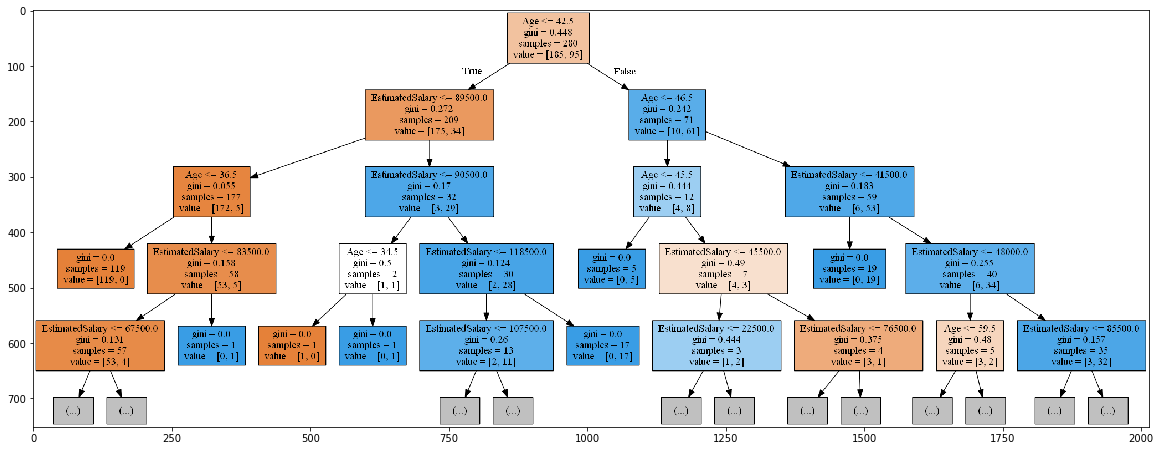

In [134]:
ecision_tree = tree.export_graphviz(dt_model,out_file='tree.dot',feature_names=X_train.columns,max_depth=4,filled=True)
!dot -Tpng tree.dot -o tree.png
image = plt.imread('tree.png')
plt.figure(figsize=(20,20))
plt.imshow(image)

In [135]:
obj = DecisionTreeClassifier(criterion="entropy")

In [136]:
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3,shuffle=True, random_state=5)

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
x_train,x_test,y_train,y_test = train_test_split(X,y)

In [140]:
obj = obj.fit(x_train,y_train)

[Text(792.825, 522.6923076923077, 'X[0] <= 42.5\nentropy = 0.945\nsamples = 300\nvalue = [191, 109]'),
 Text(395.25000000000006, 480.8769230769231, 'X[1] <= 89500.0\nentropy = 0.612\nsamples = 212\nvalue = [180, 32]'),
 Text(158.10000000000002, 439.0615384615385, 'X[0] <= 36.5\nentropy = 0.212\nsamples = 179\nvalue = [173, 6]'),
 Text(120.9, 397.2461538461539, 'entropy = 0.0\nsamples = 119\nvalue = [119, 0]'),
 Text(195.3, 397.2461538461539, 'X[1] <= 67500.0\nentropy = 0.469\nsamples = 60\nvalue = [54, 6]'),
 Text(158.10000000000002, 355.4307692307692, 'entropy = 0.0\nsamples = 32\nvalue = [32, 0]'),
 Text(232.50000000000003, 355.4307692307692, 'X[1] <= 83500.0\nentropy = 0.75\nsamples = 28\nvalue = [22, 6]'),
 Text(195.3, 313.61538461538464, 'X[1] <= 70500.0\nentropy = 0.691\nsamples = 27\nvalue = [22, 5]'),
 Text(74.4, 271.8, 'X[0] <= 39.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(37.2, 229.98461538461538, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(111.6000000000

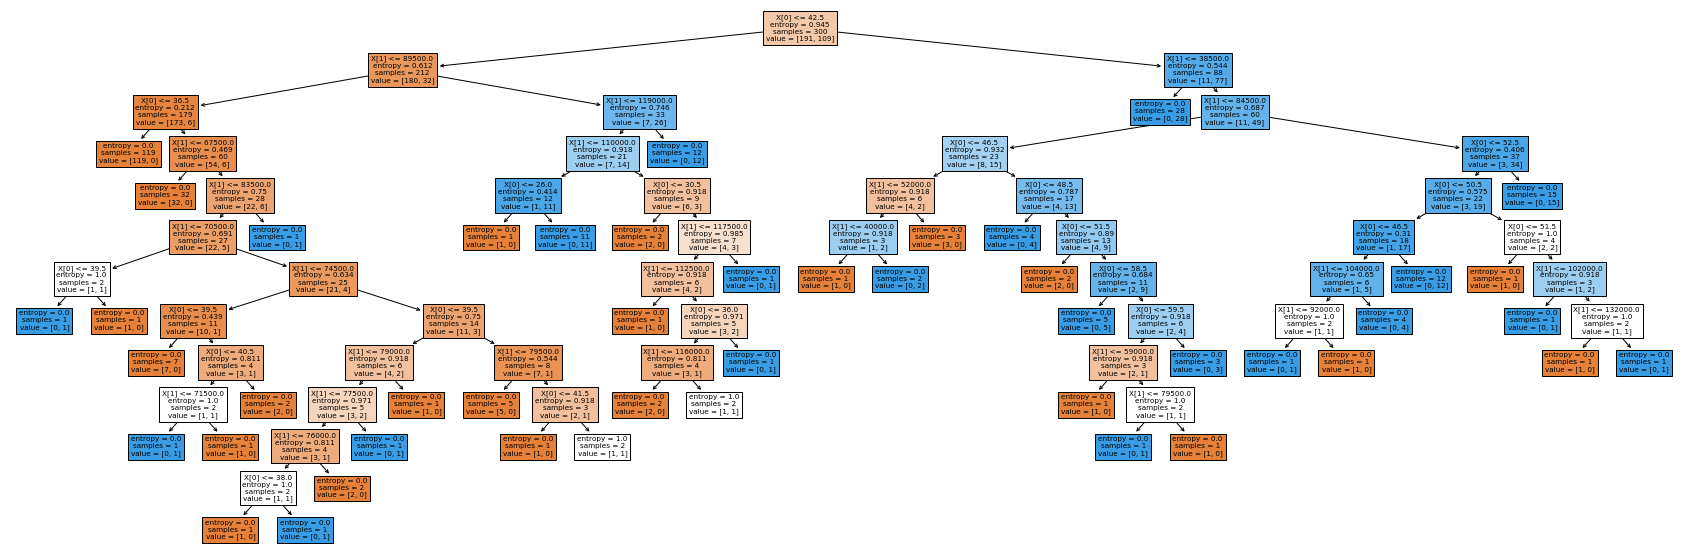

In [141]:
plt.figure(figsize = (30,10))
tree.plot_tree(obj, filled = True)

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3,shuffle=True, random_state=5)

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR = LogisticRegression(max_iter = 500).fit(X_train,y_train)
LR

LogisticRegression(max_iter=500)

In [144]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [145]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test,yhat)
cnf_matrix

array([[77,  0],
       [43,  0]], dtype=int64)

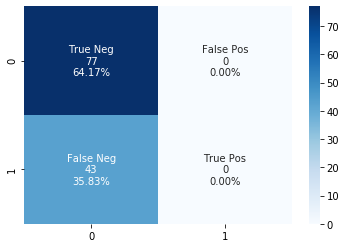

In [146]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cnf_matrix,fmt='', annot=labels,cmap='Blues')

In [147]:
tC= (sum(df['Purchased'])/len(df['Purchased'].index))*100
tC

35.75

In [148]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scale= scaler.fit(X_train)

In [149]:
X_train= scale.transform(X_train)
X_test= scale.transform(X_test)

In [150]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,yhat)

In [151]:
score

0.6416666666666667

In [152]:
TP = cnf_matrix[1,1]  
TN = cnf_matrix[0,0]
FP = cnf_matrix[0,1]
FN = cnf_matrix[1,0]
TP / float(TP+FN)


0.0

In [153]:
TN / float(TN+FP)

1.0

In [154]:
print(FP/ float(TN+FP))
print (TP / float(TP+FP))
print (TN / float(TN+ FN))

0.0
nan
0.6416666666666667


D:\annaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
